In [1]:
%cd ~/src/laboratori/1920

/home/jovyan/src/laboratori/1920


# **Introduzione al Machine Learning -- laboratorio 19 e 20**

- Salvare e caricare dataset intermedi
- Formule stile R
- Inferenza

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

Definisce una funzione `plot_resid` per visualizzare i grafici dei residui di un modello di regressione. Crea un grafico scatter dei residui rispetto ai valori predetti e un grafico scatter dei residui rispetto a ciascuna variabile predittrice.

In [50]:
# Facciamo i grafici dei residui

def plot_resid(x, results, skip_first=True):
    plt.scatter(results.fittedvalues, results.resid, alpha=0.5)
    plt.title('Residui-Previsti')
    plt.show()
    first = 1 if skip_first else 0
    for var in x.columns[first:]:
        plt.scatter(x[var], results.resid, alpha=0.5)
        plt.title(var)
        plt.show()

Definisce due funzioni per la selezione stepwise forward: `single_step` esegue un passo testando l'aggiunta di ogni variabile rimanente a quelle già selezionate, e `print_step` stampa i risultati (R-quadrato aggiustato, coefficiente) e restituisce la variabile migliore.

In [51]:
def single_step(vars, taken, df):
    results = {}

    for var in vars:
        if var in taken:
            continue
        x = sm.add_constant(df[taken + [var]])
        y = df['lmpg']
        results[var] = sm.OLS(y, x).fit()

    return results

def print_step(results):
    best = None
    max = 0
    for var in results:
        R2adj = results[var].rsquared_adj
        print(f'{var}: R²={R2adj:g}, coef={results[var].params[var]:g}')

        if R2adj > max:
            max = R2adj
            best = var
    print(f"Best: {best}, max: {max}")
    return best

Carica due DataFrame, `dft` e `dfn`, da file pickle precedentemente salvati. Questi file contengono i dati di training e i nuovi dati per la predizione.

In [52]:
dft = pd.read_pickle('pickle/fdt_train5.plk')
dfn = pd.read_pickle('pickle/dft_new4.pkl')

Visualizza il DataFrame `dft` caricato.

In [53]:
dft

,cylin,year,lmpg,ldisp,lhp,lwt,laccel,USA,EU,JP
id,,,,,,,,,,
1,8.0,70.0,2.890372,5.726848,4.867534,8.161660,2.484907,1,0,0
2,8.0,70.0,2.708050,5.857933,5.105945,8.214194,2.442347,1,0,0
3,8.0,70.0,2.890372,5.762051,5.010635,8.142063,2.397895,1,0,0
4,8.0,70.0,2.772589,5.717028,5.010635,8.141190,2.484907,1,0,0
5,8.0,70.0,2.833213,5.710427,4.941642,8.145840,2.351375,1,0,0
...,...,...,...,...,...,...,...,...,...,...
401,4.0,82.0,3.295837,4.941642,4.454347,7.933797,2.747271,1,0,0
402,4.0,82.0,3.784190,4.574711,3.951244,7.663877,3.202746,0,1,0
403,4.0,82.0,3.465736,4.905275,4.430817,7.738488,2.451005,1,0,0


Visualizza i nomi delle colonne del DataFrame `dft`.

In [54]:
dft.columns

Index(['cylin', 'year', 'lmpg', 'ldisp', 'lhp', 'lwt', 'laccel', 'USA', 'EU',
       'JP'],
      dtype='object')

Inizializza la lista `vars` con i nomi delle variabili predittrici candidate e la lista `taken` (variabili già selezionate nel modello) come vuota, per iniziare la procedura di selezione stepwise forward.

In [55]:
vars = ['cylin', 'year', 'ldisp', 'lhp', 'lwt', 'laccel', 'USA', 'EU', 'JP']
taken = []

Esegue il primo passo della selezione stepwise forward: chiama `single_step` per testare l'aggiunta di ogni variabile in `vars` al modello (che al momento contiene solo la costante). Stampa i risultati con `print_step` e memorizza la variabile migliore in `chosen`.

In [56]:
results = single_step(vars, taken, dft)
chosen = print_step(results)

cylin: R²=0.682478, coef=-0.164508
year: R²=0.332173, coef=0.0532041
ldisp: R²=0.737823, coef=-0.548554
lhp: R²=0.720563, coef=-0.841372
lwt: R²=0.762929, coef=-1.05737
laccel: R²=0.212555, coef=0.869477
USA: R²=0.317844, coef=-0.396377
EU: R²=0.0621971, coef=0.22876
JP: R²=0.193742, coef=0.373761
Best: lwt, max: 0.7629291453629575


Aggiunge la variabile `chosen` (selezionata nel passo precedente) alla lista `taken`. Esegue il secondo passo della selezione stepwise forward, testando l'aggiunta di ogni variabile rimanente al modello che ora contiene la costante e la prima variabile scelta.

In [57]:
taken += [chosen]
results = single_step(vars, taken, dft)
chosen = print_step(results)

cylin: R²=0.775648, coef=-0.0491256
year: R²=0.879521, coef=0.0328213
ldisp: R²=0.77383, coef=-0.204492
lhp: R²=0.793833, coef=-0.359883
laccel: R²=0.773131, coef=0.214799
USA: R²=0.763264, coef=-0.0273967
EU: R²=0.762321, coef=0.00163176
JP: R²=0.763296, coef=0.0299434
Best: year, max: 0.8795214599276772


Aggiunge la nuova variabile `chosen` a `taken`. Esegue il terzo passo della selezione stepwise forward.

In [58]:
taken += [chosen]
results = single_step(vars, taken, dft)
chosen = print_step(results)

cylin: R²=0.881355, coef=-0.0201094
ldisp: R²=0.881215, coef=-0.0867221
lhp: R²=0.884656, coef=-0.157372
laccel: R²=0.880063, coef=0.0617692
USA: R²=0.881724, coef=-0.0446791
EU: R²=0.881509, coef=0.0453048
JP: R²=0.879238, coef=0.005091
Best: lhp, max: 0.8846555179660891


Aggiunge la nuova variabile `chosen` a `taken`. Esegue il quarto passo della selezione stepwise forward.

In [59]:
taken += [chosen]
results = single_step(vars, taken, dft)
chosen = print_step(results)

cylin: R²=0.885125, coef=-0.0124705
ldisp: R²=0.885073, coef=-0.053578
laccel: R²=0.886265, coef=-0.145114
USA: R²=0.8872, coef=-0.0474973
EU: R²=0.885719, coef=0.0352664
JP: R²=0.884788, coef=0.0203241
Best: USA, max: 0.887200410299922


Aggiunge la nuova variabile `chosen` a `taken`. Esegue il quinto passo della selezione stepwise forward.

In [60]:
taken += [chosen]
results = single_step(vars, taken, dft)
chosen = print_step(results)

cylin: R²=0.887207, coef=-0.00793725
ldisp: R²=0.886909, coef=0.00303311
laccel: R²=0.889203, coef=-0.159399
EU: R²=0.886982, coef=0.00994245
JP: R²=0.886982, coef=-0.00994245
Best: laccel, max: 0.8892029578487393


Aggiunge la nuova variabile `chosen` a `taken`. Esegue il sesto passo della selezione stepwise forward.

In [61]:
taken += [chosen]
results = single_step(vars, taken, dft)
chosen = print_step(results)

cylin: R²=0.889711, coef=-0.0132374
ldisp: R²=0.889121, coef=-0.0354327
EU: R²=0.888948, coef=0.00661845
JP: R²=0.888948, coef=-0.00661845
Best: cylin, max: 0.8897111536353929


Aggiunge la nuova variabile `chosen` a `taken`. Esegue il settimo passo della selezione stepwise forward. In questo caso, 'EU' e 'JP' non vengono selezionate perché l'R-quadrato aggiustato non migliora o peggiora.

In [62]:
taken += [chosen]
results = single_step(vars, taken, dft)
chosen = print_step(results)

ldisp: R²=0.889452, coef=0.0173379
EU: R²=0.889426, coef=0.0020575
JP: R²=0.889426, coef=-0.0020575
Best: ldisp, max: 0.8894516907331907


Visualizza la lista finale `taken` delle variabili selezionate dalla procedura stepwise forward.

In [63]:
taken

['lwt', 'year', 'lhp', 'USA', 'laccel', 'cylin']

Crea la matrice dei predittori `x` usando le variabili selezionate in `taken` e aggiungendo una costante. Definisce la variabile dipendente `y` come 'lmpg'. Adatta un modello OLS (Ordinary Least Squares) e stampa il sommario completo dei risultati.

In [64]:
x = sm.add_constant(dft[taken])
y = dft['lmpg']
results = sm.OLS(y, x).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   lmpg   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     525.4
Date:                Sat, 10 May 2025   Prob (F-statistic):          1.11e-181
Time:                        09:06:39   Log-Likelihood:                 302.03
No. Observations:                 391   AIC:                            -590.1
Df Residuals:                     384   BIC:                            -562.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2386      0.352     20.543      0.0

Utilizza la funzione `plot_resid` definita precedentemente per visualizzare i grafici dei residui del modello finale ottenuto dalla selezione stepwise.

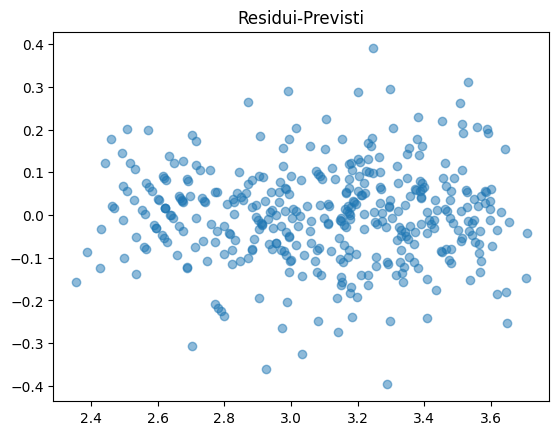

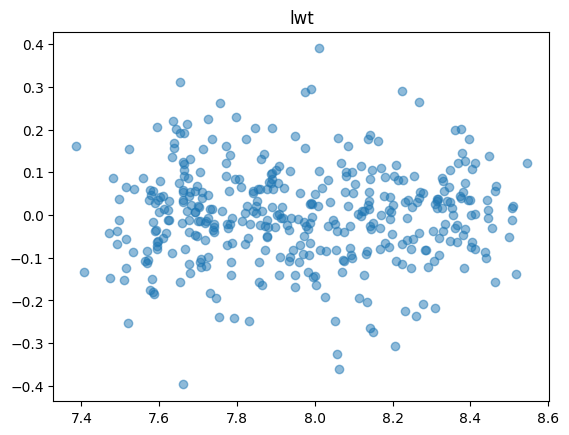

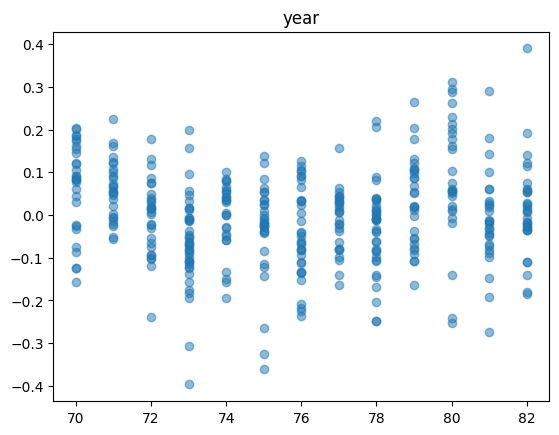

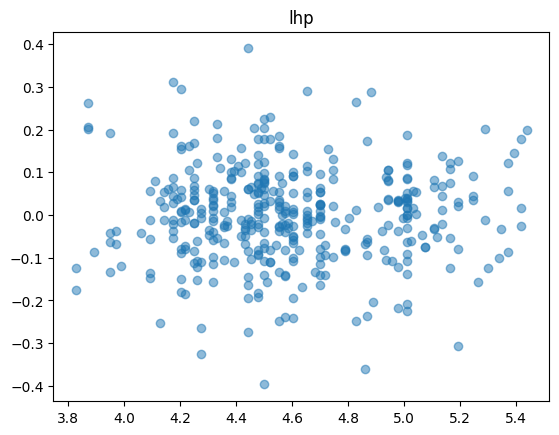

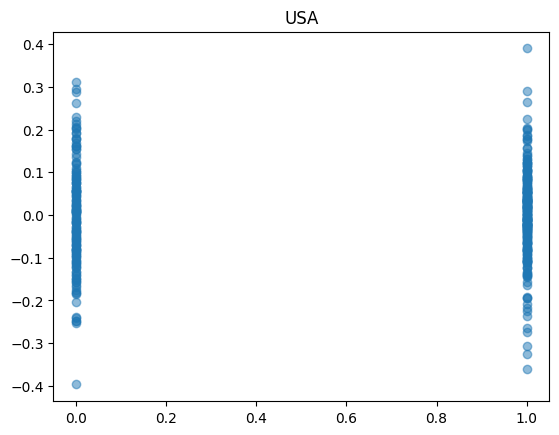

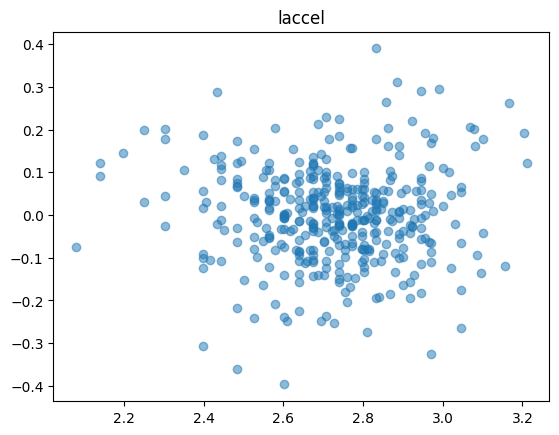

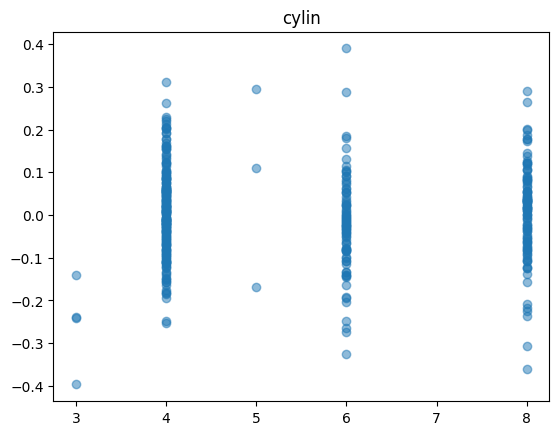

In [65]:
plot_resid(x, results, skip_first=True)

https://www.statsmodels.org/stable/example_formulas.html

Importa `statsmodels.formula.api` come `smf` per utilizzare la sintassi delle formule stile R. Adatta un modello OLS usando una formula che include le variabili selezionate ('lwt', 'year', 'lhp', 'USA', 'laccel', 'cylin') per predire 'lmpg'. Stampa il sommario dei risultati.

In [66]:
import statsmodels.formula.api as smf

results = smf.ols(formula='lmpg ~ lwt + year + lhp + USA + laccel + cylin', data=dft).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   lmpg   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     525.4
Date:                Sat, 10 May 2025   Prob (F-statistic):          1.11e-181
Time:                        09:06:40   Log-Likelihood:                 302.03
No. Observations:                 391   AIC:                            -590.1
Df Residuals:                     384   BIC:                            -562.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.2386      0.352     20.543      0.0

Adatta un nuovo modello OLS aggiungendo un termine quadratico per la variabile 'year' (`I(year**2)`) alla formula precedente. Stampa il sommario dei risultati.

In [67]:
results = smf.ols(formula='lmpg ~ lwt + year + lhp + USA + laccel + cylin + I(year**2)', data=dft).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   lmpg   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     482.5
Date:                Sat, 10 May 2025   Prob (F-statistic):          1.24e-185
Time:                        09:06:40   Log-Likelihood:                 314.58
No. Observations:                 391   AIC:                            -613.2
Df Residuals:                     383   BIC:                            -581.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       20.4285      2.639      7.740   

Adatta un altro modello OLS aggiungendo un termine quadratico per 'cylin' (`I(cylin**2)`) alla formula che già include il termine quadratico per 'year'. Stampa il sommario e l'R-quadrato aggiustato.

In [68]:
results = smf.ols(formula='lmpg ~ lwt + year + lhp + USA + laccel + cylin + I(year**2) + I(cylin**2)', data=dft).fit()
print(results.summary())
print(results.rsquared_adj)

                            OLS Regression Results                            
Dep. Variable:                   lmpg   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     421.2
Date:                Sat, 10 May 2025   Prob (F-statistic):          2.71e-184
Time:                        09:06:40   Log-Likelihood:                 314.62
No. Observations:                 391   AIC:                            -611.2
Df Residuals:                     382   BIC:                            -575.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        20.4163      2.643      7.725

Prova un modello alternativo sostituendo il termine quadratico di 'cylin' con un termine quadratico per 'laccel' (`I(laccel**2)`). Stampa il sommario e l'R-quadrato aggiustato.

In [69]:
results = smf.ols(formula='lmpg ~ lwt + year + lhp + USA + laccel + cylin + I(year**2) + I(laccel**2)', data=dft).fit()
print(results.summary())
print(results.rsquared_adj)

                            OLS Regression Results                            
Dep. Variable:                   lmpg   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     426.9
Date:                Sat, 10 May 2025   Prob (F-statistic):          2.78e-185
Time:                        09:06:40   Log-Likelihood:                 316.96
No. Observations:                 391   AIC:                            -615.9
Df Residuals:                     382   BIC:                            -580.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         20.7752      2.632      7.

Aggiunge un termine di interazione tra 'lwt' e 'year' (`lwt * year`) al modello precedente che include i termini quadratici per 'year' e 'laccel'. Stampa il sommario e l'R-quadrato aggiustato.

In [70]:
results = smf.ols(formula='lmpg ~ lwt * year + lhp + USA + laccel + cylin + I(year**2) + I(laccel**2)', data=dft).fit()
print(results.summary())
print(results.rsquared_adj)

                            OLS Regression Results                            
Dep. Variable:                   lmpg   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     380.3
Date:                Sat, 10 May 2025   Prob (F-statistic):          2.58e-184
Time:                        09:06:40   Log-Likelihood:                 317.81
No. Observations:                 391   AIC:                            -615.6
Df Residuals:                     381   BIC:                            -575.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         27.0665      5.536      4.

Definisce la formula del modello finale, che include l'interazione 'lwt*year' e i termini quadratici 'I(year**2)' e 'I(laccel**2)'. Adatta il modello OLS con questa formula e stampa il sommario dei risultati.

In [71]:
# Modello finale

formula = 'lmpg ~ lwt * year + lhp + USA + laccel + cylin + I(year**2) + I(laccel**2)'
model = smf.ols(formula=formula, data=dft)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   lmpg   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     380.3
Date:                Sat, 10 May 2025   Prob (F-statistic):          2.58e-184
Time:                        09:06:40   Log-Likelihood:                 317.81
No. Observations:                 391   AIC:                            -615.6
Df Residuals:                     381   BIC:                            -575.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         27.0665      5.536      4.

Calcola la somma dei quadrati dei residui (SSR) per il modello finale sui dati di training `dft`, confrontando le predizioni del modello con i valori effettivi di 'lmpg'.

In [72]:
np.sum((results.predict(dft) - dft['lmpg']) ** 2)

np.float64(4.5049969190397)

Calcola la somma dei quadrati dei residui (SSR) utilizzando l'attributo `mse_resid` (errore quadratico medio dei residui) e `df_resid` (gradi di libertà dei residui) del modello. Questo dovrebbe dare lo stesso risultato della cella precedente.

In [73]:
results.mse_resid * results.df_resid

np.float64(4.504996919039699)

Verifica che `results.predict()` applicato ai dati di training `dft` produca predizioni consistenti. Stampa la SSR calcolata manualmente e quella ottenuta dagli attributi del modello per confronto.

In [74]:
# results.predict() fa la cosa attesa, ovvero applica la stessa formula ai nuovi dati

print(f'{np.sum((results.predict(dft) - dft["lmpg"])**2):g}')
print(f'{results.mse_resid * results.df_resid:g}')

4.505
4.505


Visualizza il DataFrame `dfn`, che contiene i nuovi dati per i quali si vogliono fare previsioni.

In [75]:
dfn

,cylin,year,ldisp,lhp,lwt,laccel,USA,EU
id,,,,,,,,
11,4.0,70.0,4.890349,4.744932,8.035926,2.862201,0,1
12,8.0,70.0,5.857933,5.105945,8.328934,2.442347,1,0
13,8.0,70.0,5.860786,5.030438,8.302514,2.397895,1,0
14,8.0,70.0,5.948035,5.164786,8.334712,2.351375,1,0
15,8.0,70.0,5.886104,5.164786,8.255828,2.397895,1,0
18,8.0,70.0,5.710427,4.941642,8.117611,2.079442,1,0
40,4.0,71.0,4.574711,3.871201,7.589842,2.995732,0,1
367,4.0,81.0,4.795791,4.700480,7.937375,2.734368,0,1


Utilizza il modello finale (`results`) per fare previsioni puntuali della variabile 'lmpg' per i nuovi dati contenuti in `dfn`.

In [76]:
# Previsioni puntuali per lmpg

results.predict(dfn)

id
11     2.899372
12     2.603046
13     2.656301
14     2.612969
15     2.641780
18     2.925869
40     3.418562
367    3.299953
dtype: float64

Calcola gli intervalli di confidenza al 95% per le previsioni medie delle risposte future (`lmpg`) sui nuovi dati `dfn`. Utilizza il metodo `get_prediction()` e `conf_int()`.

In [77]:
# Facciamo un intervallo di predizione per risposte future

conf = 0.95
alpha = 1 - conf
pred = results.get_prediction(dfn)
pred_ci = pred.conf_int(alpha=alpha)
print(pred_ci)

[[2.85092556 2.94781884]
 [2.56802707 2.6380643 ]
 [2.61893288 2.69366969]
 [2.57527505 2.65066208]
 [2.60830093 2.67525839]
 [2.83359855 3.01814   ]
 [3.36855936 3.4685647 ]
 [3.26307991 3.33682665]]


Importa la distribuzione t da `scipy.stats`. Calcola il quantile `q` della distribuzione t (per un intervallo di confidenza del 95% e i gradi di libertà dei residui del modello) e la deviazione standard dei residui `Se`.

In [78]:
from scipy.stats import t

q = t.ppf(1-alpha/2, results.df_resid) # 1.9662099
Se = np.sqrt(results.mse_resid)        # 0.1087389

Visualizza la stringa della formula utilizzata per il modello finale.

In [79]:
formula

'lmpg ~ lwt * year + lhp + USA + laccel + cylin + I(year**2) + I(laccel**2)'

Crea una copia del DataFrame di training `dft` chiamata `dft2`. Aggiunge manualmente le colonne per i termini di interazione ('lwt*year') e i termini quadratici ('year2', 'laccel2') presenti nella formula del modello finale. Visualizza `dft2`.

In [80]:
dft2 = dft.copy()
dft2['lwt*year'] = dft2['lwt'] * dft2['year']
dft2['year2'] = dft2['year'] ** 2
dft2['laccel2'] = dft2['laccel'] ** 2
dft2

,cylin,year,lmpg,ldisp,lhp,lwt,laccel,USA,EU,JP,lwt*year,year2,laccel2
id,,,,,,,,,,,,,
1,8.0,70.0,2.890372,5.726848,4.867534,8.161660,2.484907,1,0,0,571.316232,4900.0,6.174761
2,8.0,70.0,2.708050,5.857933,5.105945,8.214194,2.442347,1,0,0,574.993609,4900.0,5.965059
3,8.0,70.0,2.890372,5.762051,5.010635,8.142063,2.397895,1,0,0,569.944430,4900.0,5.749902
4,8.0,70.0,2.772589,5.717028,5.010635,8.141190,2.484907,1,0,0,569.883286,4900.0,6.174761
5,8.0,70.0,2.833213,5.710427,4.941642,8.145840,2.351375,1,0,0,570.208773,4900.0,5.528966
...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,4.0,82.0,3.295837,4.941642,4.454347,7.933797,2.747271,1,0,0,650.571344,6724.0,7.547497
402,4.0,82.0,3.784190,4.574711,3.951244,7.663877,3.202746,0,1,0,628.437935,6724.0,10.257585
403,4.0,82.0,3.465736,4.905275,4.430817,7.738488,2.451005,1,0,0,634.556026,6724.0,6.007426


Visualizza nuovamente la stringa della formula per riferimento.

In [81]:
formula

'lmpg ~ lwt * year + lhp + USA + laccel + cylin + I(year**2) + I(laccel**2)'

Definisce una lista `vars` contenente i nomi delle colonne (incluse quelle create per interazioni e termini quadratici) che compongono la matrice dei predittori per il calcolo manuale.

In [82]:
vars = ['cylin', 'year', 'lhp', 'lwt', 'laccel', 'USA', 'lwt*year', 'year2', 'laccel2']

Crea la matrice del disegno `X` per i dati di training `dft2` selezionando le colonne specificate in `vars` e aggiungendo una costante (intercetta). Visualizza la matrice `X`.

In [83]:
X = sm.add_constant(dft2[vars])
X

,const,cylin,year,lhp,lwt,laccel,USA,lwt*year,year2,laccel2
id,,,,,,,,,,
1,1.0,8.0,70.0,4.867534,8.161660,2.484907,1,571.316232,4900.0,6.174761
2,1.0,8.0,70.0,5.105945,8.214194,2.442347,1,574.993609,4900.0,5.965059
3,1.0,8.0,70.0,5.010635,8.142063,2.397895,1,569.944430,4900.0,5.749902
4,1.0,8.0,70.0,5.010635,8.141190,2.484907,1,569.883286,4900.0,6.174761
5,1.0,8.0,70.0,4.941642,8.145840,2.351375,1,570.208773,4900.0,5.528966
...,...,...,...,...,...,...,...,...,...,...
401,1.0,4.0,82.0,4.454347,7.933797,2.747271,1,650.571344,6724.0,7.547497
402,1.0,4.0,82.0,3.951244,7.663877,3.202746,0,628.437935,6724.0,10.257585
403,1.0,4.0,82.0,4.430817,7.738488,2.451005,1,634.556026,6724.0,6.007426


Calcola la matrice di covarianza dei coefficienti del modello, `cov = (X^T X)^-1`, utilizzando la matrice del disegno `X`. Visualizza la matrice `cov`.

In [84]:
cov = np.linalg.inv(X.T @ X)
cov

array([[ 2.59175762e+03,  2.39415848e-01, -4.58700086e+01,
        -3.85125238e+00, -2.01373084e+02, -3.64774569e+01,
        -5.12610044e-01,  2.71423075e+00,  1.60631413e-01,
         5.65957600e+00],
       [ 2.39415848e-01,  5.04084338e-03, -3.81843395e-03,
        -1.40751627e-03, -2.98215868e-02,  5.22962849e-02,
        -1.97487954e-03,  1.22313235e-04,  1.96395131e-05,
        -8.30142548e-03],
       [-4.58700086e+01, -3.81843395e-03,  9.10683978e-01,
         8.55641214e-02,  3.02907367e+00, -5.03078342e-01,
         1.49660630e-02, -4.15168768e-02, -3.82875317e-03,
         1.08168254e-01],
       [-3.85125238e+00, -1.40751627e-03,  8.55641214e-02,
         2.63898750e-01,  3.11949340e-02, -1.21051865e-01,
         7.81831925e-03, -3.40494943e-03, -3.73628059e-04,
         5.94428653e-02],
       [-2.01373084e+02, -2.98215868e-02,  3.02907367e+00,
         3.11949340e-02,  2.07411999e+01,  3.02041102e+00,
         1.66054473e-02, -2.73585692e-01, -5.72911336e-03,
        -4.

Calcola manualmente il vettore dei coefficienti `B = cov @ X^T @ y` per verificare che la matrice `X` e `cov` siano corrette. Confronta il quinto coefficiente (corrispondente a 'lwt') con quello ottenuto dal modello `statsmodels`.

In [85]:
# Controllo che la matrice sia giusta

y = dft['lmpg']

B = cov @ (X.T @ y) # Controllo il quinto coefficiente, che corrisponde a lwt ed è -1.1709 come sopra
B

array([ 2.70664897e+01, -1.38021350e-02, -3.81980318e-01, -3.08029495e-01,
       -1.17094785e+00, -1.58229729e+00, -5.07496942e-02,  8.50818584e-03,
        2.27063100e-03,  2.58138784e-01])

Crea una copia del DataFrame dei nuovi dati `dfn` chiamata `dfn2`. Aggiunge manualmente le colonne per i termini di interazione e quadratici, come fatto per `dft2`. Visualizza `dfn2`.

In [86]:
dfn2 = dfn.copy()
dfn2['lwt*year'] = dfn2['lwt'] * dfn2['year']
dfn2['year2'] = dfn2['year'] ** 2
dfn2['laccel2'] = dfn2['laccel'] ** 2
dfn2

,cylin,year,ldisp,lhp,lwt,laccel,USA,EU,lwt*year,year2,laccel2
id,,,,,,,,,,,
11,4.0,70.0,4.890349,4.744932,8.035926,2.862201,0,1,562.514846,4900.0,8.192194
12,8.0,70.0,5.857933,5.105945,8.328934,2.442347,1,0,583.025383,4900.0,5.965059
13,8.0,70.0,5.860786,5.030438,8.302514,2.397895,1,0,581.175960,4900.0,5.749902
14,8.0,70.0,5.948035,5.164786,8.334712,2.351375,1,0,583.429814,4900.0,5.528966
15,8.0,70.0,5.886104,5.164786,8.255828,2.397895,1,0,577.907990,4900.0,5.749902
18,8.0,70.0,5.710427,4.941642,8.117611,2.079442,1,0,568.232752,4900.0,4.324077
40,4.0,71.0,4.574711,3.871201,7.589842,2.995732,0,1,538.878747,5041.0,8.974412
367,4.0,81.0,4.795791,4.700480,7.937375,2.734368,0,1,642.927350,6561.0,7.476766


Crea la matrice del disegno `x_tilde` per i nuovi dati `dfn2`, selezionando le colonne `vars` e aggiungendo una costante. Visualizza `x_tilde`.

In [87]:
x_tilde = sm.add_constant(dfn2[vars])
x_tilde

,const,cylin,year,lhp,lwt,laccel,USA,lwt*year,year2,laccel2
id,,,,,,,,,,
11,1.0,4.0,70.0,4.744932,8.035926,2.862201,0,562.514846,4900.0,8.192194
12,1.0,8.0,70.0,5.105945,8.328934,2.442347,1,583.025383,4900.0,5.965059
13,1.0,8.0,70.0,5.030438,8.302514,2.397895,1,581.175960,4900.0,5.749902
14,1.0,8.0,70.0,5.164786,8.334712,2.351375,1,583.429814,4900.0,5.528966
15,1.0,8.0,70.0,5.164786,8.255828,2.397895,1,577.907990,4900.0,5.749902
18,1.0,8.0,70.0,4.941642,8.117611,2.079442,1,568.232752,4900.0,4.324077
40,1.0,4.0,71.0,3.871201,7.589842,2.995732,0,538.878747,5041.0,8.974412
367,1.0,4.0,81.0,4.700480,7.937375,2.734368,0,642.927350,6561.0,7.476766


Calcola manualmente le previsioni puntuali per i nuovi dati: `pred = x_tilde @ B`. Visualizza le previsioni, che dovrebbero essere uguali a quelle ottenute con `results.predict(dfn)`.

In [88]:
pred = x_tilde @ B
pred # Vengono uguali a prima

id
11     2.899372
12     2.603046
13     2.656301
14     2.612969
15     2.641780
18     2.925869
40     3.418562
367    3.299953
dtype: float64

Visualizza le dimensioni (forma) della matrice `x_tilde`.

In [89]:
x_tilde.shape

(8, 10)

Visualizza le dimensioni (forma) della matrice di covarianza `cov`.

In [90]:
cov.shape

(10, 10)

Calcola la matrice `C = x_tilde @ cov @ x_tilde.T`. Estrae la diagonale di `C`, che contiene le varianze delle risposte medie predette per ogni nuova osservazione, e la memorizza in `scal`.

In [91]:
C = x_tilde.values @ cov @ x_tilde.values.T # Matrice 8x8, mi interessa la diagonale
scal = np.diag(C)
scal

array([0.05134499, 0.02682679, 0.03054779, 0.03108165, 0.02451933,
       0.18625099, 0.05469619, 0.02974379])

Visualizza la matrice `x_tilde` (matrice del disegno per i nuovi dati).

In [92]:
x_tilde

,const,cylin,year,lhp,lwt,laccel,USA,lwt*year,year2,laccel2
id,,,,,,,,,,
11,1.0,4.0,70.0,4.744932,8.035926,2.862201,0,562.514846,4900.0,8.192194
12,1.0,8.0,70.0,5.105945,8.328934,2.442347,1,583.025383,4900.0,5.965059
13,1.0,8.0,70.0,5.030438,8.302514,2.397895,1,581.175960,4900.0,5.749902
14,1.0,8.0,70.0,5.164786,8.334712,2.351375,1,583.429814,4900.0,5.528966
15,1.0,8.0,70.0,5.164786,8.255828,2.397895,1,577.907990,4900.0,5.749902
18,1.0,8.0,70.0,4.941642,8.117611,2.079442,1,568.232752,4900.0,4.324077
40,1.0,4.0,71.0,3.871201,7.589842,2.995732,0,538.878747,5041.0,8.974412
367,1.0,4.0,81.0,4.700480,7.937375,2.734368,0,642.927350,6561.0,7.476766


Calcola manualmente i limiti superiori (`ucb`) e inferiori (`lcb`) dell'intervallo di predizione per ogni nuova osservazione, usando la formula: `predizione ± q * Se * sqrt(1 + varianza_risposta_media_predetta)`. Stampa i limiti per ogni osservazione.

In [93]:
ucb = pred.values + q * Se * np.sqrt(1 + scal)
lcb = pred.values - q * Se * np.sqrt(1 + scal)

for i in range(len(ucb)):
    print(f'{lcb[i]:g} {ucb[i]:g}')

2.68015 3.1186
2.38639 2.8197
2.43926 2.87335
2.39587 2.83007
2.42537 2.85819
2.693 3.15873
3.19899 3.63813
3.08299 3.51691


Stampa gli intervalli di confidenza (`pred_ci`) calcolati precedentemente con il metodo `get_prediction().conf_int()` per confronto con i calcoli manuali.

In [94]:
print(pred_ci)

[[2.85092556 2.94781884]
 [2.56802707 2.6380643 ]
 [2.61893288 2.69366969]
 [2.57527505 2.65066208]
 [2.60830093 2.67525839]
 [2.83359855 3.01814   ]
 [3.36855936 3.4685647 ]
 [3.26307991 3.33682665]]


Calcola l'ampiezza degli intervalli di predizione ottenuti da `statsmodels` (`wi_ci`) e quelli calcolati manualmente (`wi_my`). Crea un grafico scatter per confrontare le due serie di ampiezze, verificando che siano consistenti.

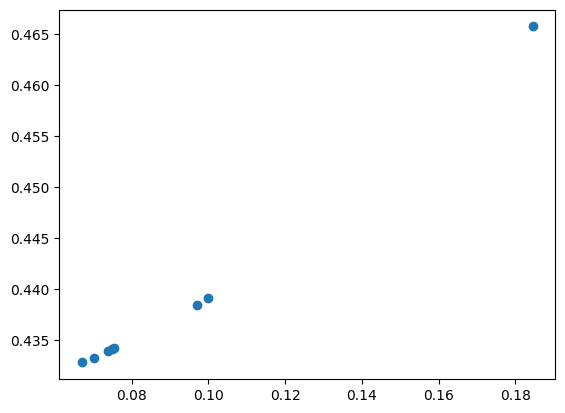

In [95]:
wi_ci = pred_ci[:,1] - pred_ci[:,0]
wi_my = ucb - lcb
plt.plot(wi_ci, wi_my, 'o')
plt.show()